## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata_df, study_results_df)
# Display the data table for preview
combined_df.to_csv(r"data/combined.csv")
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Check the number of mice.
number_of_mice = combined_df["Mouse ID"].unique()
len(number_of_mice)

249

In [3]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Drop any duplicate rows
clean_combined_df = combined_df.drop([combined_df.index[909], 
                                      combined_df.index[911], 
                                      combined_df.index[913], 
                                      combined_df.index[915], 
                                      combined_df.index[917]])

In [5]:
# Recheck the number of mice
len(clean_combined_df["Mouse ID"].unique())

249

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
grouped_combined_df = clean_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([np.mean, 
                                                                                           np.median, 
                                                                                           np.var, 
                                                                                           np.std, 
                                                                                           sem])
summary_stats_df = grouped_combined_df.rename(columns={"mean": "Mean Tumor Volume", 
                                                       "median": "Median Tumor Volume", 
                                                       "var": "Tumor Volume Variance", 
                                                       "std": "Tumor Volume Std. Dev.", 
                                                       "sem": "Tumor Volume Std. Err."})
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

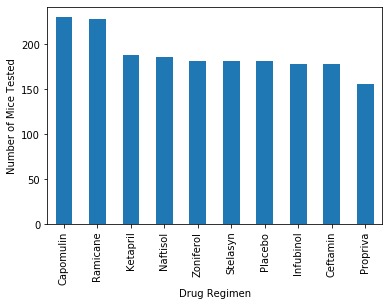

<Figure size 432x288 with 0 Axes>

In [16]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen

mouse_per_drug = clean_combined_df["Drug Regimen"].value_counts().to_frame("Number of Mice")
mouse_per_drug.reset_index(inplace=True)
mouse_per_drug_df = mouse_per_drug.rename(columns={"index": "Drugs"})

mouse_per_drug_df.set_index("Drugs")
bar_plot1 = mouse_per_drug_df.plot(kind="bar", legend=False)
bar_plot1.set_xticklabels(mouse_per_drug_df["Drugs"], rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()
plt.tight_layout()

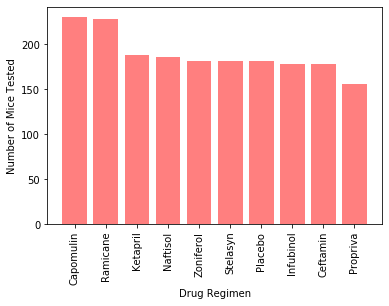

<Figure size 432x288 with 0 Axes>

In [17]:
# Generate identical bar plot using pyplot instead of pandas.
drugs_list = list(mouse_per_drug_df["Drugs"])
x_axis = np.arange(len(drugs_list))
tick_location = [i for i in x_axis]
plt.bar(x_axis, mouse_per_drug_df["Number of Mice"], color='r', alpha=0.5, align="center")
plt.xticks(tick_location, mouse_per_drug_df["Drugs"], rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()
plt.tight_layout()

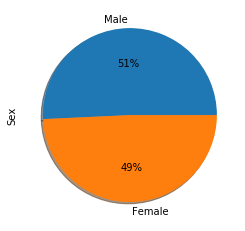

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = clean_combined_df["Sex"].value_counts().to_frame()
mice_gender_df = mice_gender.rename(columns={"Sex": "Sex"})
pie_plot = mice_gender_df.plot(kind="pie", y="Sex", autopct="%1.0f%%", shadow=True, legend=False)

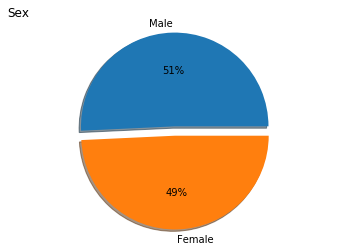

In [19]:
# Generate identical pie plot using pyplot
mice_gender_df
gender = ["Male", "Female"]
explode = (0.1, 0)
plt.pie(list(mice_gender_df["Sex"]), explode=explode, labels=gender, autopct="%1.0f%%", shadow=True)
plt.axis("equal")
plt.title("Sex", loc="left")
plt.show()

## Quartiles, Outliers and Boxplots

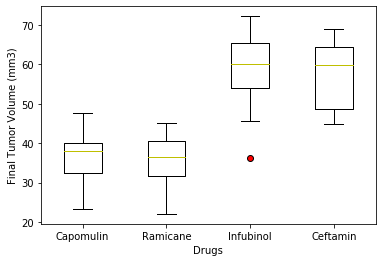

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

timepoints = clean_combined_df["Timepoint"].unique()
last_timepoint = timepoints[-1]

mouse_timepoints = clean_combined_df.groupby("Mouse ID")["Timepoint"].apply(lambda x: list(np.unique(x)))
mouse_timepoints_df = mouse_timepoints.to_frame()
mouse_timepoints_df1 = mouse_timepoints_df.reset_index()
a = list(mouse_timepoints_df1["Mouse ID"])
b = list(mouse_timepoints_df1["Timepoint"])
c = list(zip(a, b))

last_timepoint_mouse = [(i, j[-1]) for i, j in c]
last_timepoint_mouse

clean_combined_df_ex = clean_combined_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]]
clean_combined_df_ex

list_of_mice = []
for tup in last_timepoint_mouse:
    list_of_mice.append(tup[0])
list_of_mice

list_of_timepoints = []
for tups in last_timepoint_mouse:
    list_of_timepoints.append(tups[1])
list_of_timepoints

mouse_timepoints = {"Mouse ID": list_of_mice, "Timepoint": list_of_timepoints}
mouse_timepoints_df = pd.DataFrame(mouse_timepoints)
mouse_timepoints_df

merged_df = pd.merge(clean_combined_df_ex, mouse_timepoints_df)
merged_df

# last_timepoint_mouse
drugs_list = list(merged_df["Drug Regimen"])
drugs_tumors = list(merged_df["Tumor Volume (mm3)"])
zipped_list = list(zip(drugs_list, drugs_tumors))

capomulin_tumor_vol = [f[1] for f in zipped_list if f[0] == "Capomulin"]
ramicane_tumor_vol = [g[1] for g in zipped_list if g[0] == "Ramicane"]
infubinol_tumor_vol = [h[1] for h in zipped_list if h[0] == "Infubinol"]
ceftamin_tumor_vol = [l[1] for l in zipped_list if l[0] == "Ceftamin"]

df_tumors = {"Capomulin": capomulin_tumor_vol, 
                 "Ramicane": ramicane_tumor_vol, 
                 "Infubinol": infubinol_tumor_vol, 
                 "Ceftamin": ceftamin_tumor_vol}
df_tumors_df = pd.DataFrame(df_tumors)

barplot = df_tumors_df.plot(kind="box", color=dict(boxes="black", whiskers="black", medians='y', caps="black"), 
                            flierprops=dict(marker='o', markerfacecolor='r'))
barplot.set_xlabel("Drugs")
barplot.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [32]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.
# One method to do this is the following, but you can use whatever method works for you.
##############################################################################
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

# Capomulin
quartiles = df_tumors_df["Capomulin"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"Quartiles, IQR, and Potential Outliers for Capomulin")
print(f"----------------------------------------------------")
print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.\n\n")

# Ramicane
quartiles = df_tumors_df["Ramicane"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"Quartiles, IQR, and Potential Outliers for Ramicane")
print(f"----------------------------------------------------")
print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.\n\n")

# Infubinol
quartiles = df_tumors_df["Infubinol"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"Quartiles, IQR, and Potential Outliers for Infubinol")
print(f"----------------------------------------------------")
print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.\n\n")

# Ceftamin
quartiles = df_tumors_df["Ceftamin"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"Quartiles, IQR, and Potential Outliers for Ceftamin")
print(f"----------------------------------------------------")
print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Quartiles, IQR, and Potential Outliers for Capomulin
----------------------------------------------------
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


Quartiles, IQR, and Potential Outliers for Ramicane
----------------------------------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


Quartiles, IQR, and Potential Outliers for Infubinol
----------------------------------------------------
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
Values below 36.832904949999

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Observations and Insights